<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.02-Mineracao-de-Dados-com-Scikit-Learn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Mineração de Dados com o Scikit-Learn

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) 


# Introdução ao Scikit-Learn

Existem várias bibliotecas Python que fornecem implementações sólidas de uma variedade de algoritmos de aprendizado de máquina. Um dos mais conhecidos é o [Scikit-Learn](https://translate.google.com/website?sl=auto&tl=pt&hl=pt-BR&client=webapp&u=http://scikit-learn.org), um pacote que fornece versões eficientes de um grande número de algoritmos de aprendizado de máquina e ciência de dados. 

Scikit-Learn é uma API limpa, uniforme e simplificada, possuindo uma documentação online muito útil e completa. Um benefício dessa uniformidade é que, depois de compreender o uso básico e a sintaxe do Scikit-Learn para um tipo de modelo, mudar para um novo modelo ou algoritmo é muito simples.

## Representação de dados no Scikit-Learn

O **aprendizado de máquina** trata da criação de modelos a partir de dados: por esse motivo, começaremos discutindo como os dados podem ser representados para serem compreendidos pelo computador. A melhor maneira de pensar sobre os dados no Scikit-Learn é em termos de tabelas de dados.

### Dados como tabela



Uma tabela básica é uma grade bidimensional de dados, na qual as linhas representam elementos individuais do conjunto de dados e as colunas representam quantidades relacionadas a cada um desses elementos. 

Por exemplo, considere o conjunto de dados [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), analisado por Ronald Fisher em 1936. Podemos baixar esse conjunto de dados na forma de Pandas ``DataFrame`` usando  o módulo `datasets` do Scikit-Learn.

In [12]:
import pandas as pd
from sklearn import datasets

dataset = datasets.load_iris()
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris['species'] = dataset.target_names[dataset.target]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Cada linha dos dados refere-se a uma única flor observada, e o número de linhas é o número total de flores no conjunto de dados. Em geral, nos referiremos às linhas da matriz como amostras e ao número de linhas como ``n_samples``.



Cada coluna dos dados refere-se a uma informação quantitativa específica que descreve cada amostra. Em geral, nos referiremos às colunas da matriz como recursos e ao número de colunas como ``n_features``.

#### Matriz de características (*feature matrix*)

Este layout de tabela deixa claro que a informação pode ser pensada como uma matriz ou matriz numérica bidimensional, que chamaremos de matriz de características. Por convenção, essa matriz de recursos geralmente é armazenada em uma variável chamada ``X``.


A matriz de características é considerada bidimensional, com formato ``[n_samples, n_features]``, e geralmente é representada por uma matriz NumPy ou Pandas ``DataFrame``, embora alguns modelos Scikit-Learn também aceitem matrizes esparsas do SciPy.


As amostras (ou seja, linhas) sempre se referem aos objetos individuais descritos pelo conjunto de dados. Por exemplo, a amostra pode ser uma flor, uma pessoa, um documento, uma imagem, um arquivo de som, um vídeo, um objeto astronômico ou qualquer outra coisa que você possa descrever com um conjunto de medidas quantitativas.


As características (isto é, colunas) referem-se sempre às observações distintas que descrevem cada amostra de forma quantitativa. Os recursos geralmente têm valor real, mas podem ter valor booleano ou discreto em alguns casos.

#### Valor alvo (*target array*)

Além da matriz de caracterísitcas ``X``, geralmente também trabalhamos com um rótulo ou valor alvo, que por convenção normalmente chamaremos de ``y``. O valor alvo geralmente é unidimensional, com comprimento ``n_samples`` e geralmente é representado por uma matriz NumPy ou Pandas ``Series``. 

O valor alvo pode ter valores numéricos contínuos ou classes/rótulos discretos. Embora alguns estimadores Scikit-Learn lidem com vários valores alvos na forma de uma matriz bidimensional ``[n_samples, n_targets]``, trabalharemos principalmente com o caso comum de um vetor alvo unidimensional.


Um ponto de confusão freqüentemente é como o valor alvo difere das outras colunas de características. A característica distintiva dos valores objetivos é que geralmente é a quantidade que queremos *prever a partir dos dados*: em termos estatísticos, é a **variável dependente**. 

Por exemplo, nos dados anteriores podemos desejar construir um modelo que possa prever as espécies de flores com base em outras medições; neste caso, a coluna ``species`` seria considerada o vetor alvo.

  Com isso em mente, podemos usar o Seaborn para visualizar os dados de maneira conveniente:

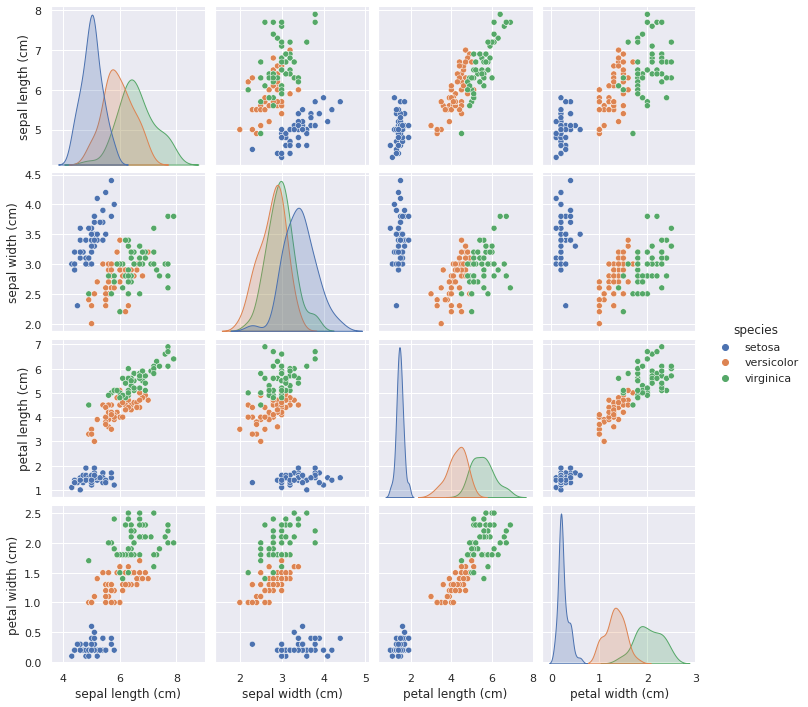

In [15]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=2.5);

Para uso no Scikit-Learn, extrairemos a matriz de características e o vetor alvo do ``DataFrame``:

In [18]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [21]:
y_iris = iris['species']
y_iris.shape

(150,)

Com esses dados formatados corretamente, podemos considerar os *estimadores* presentes na API do Scikit-Learn.

## Estimadores

O Scikit-Learn foi projetada com os seguintes princípios orientadores em mente (veja [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238)):

- *Consistência*: todos os objetos compartilham uma interface comum extraída de um conjunto limitado de métodos, com documentação consistente.

- *Inspeção*: todos os valores de parâmetros especificados são expostos como atributos públicos.

- *Hierarquia de objetos limitada*: apenas algoritmos são representados por classes Python; os conjuntos de dados são representados em formatos padrão (matrizes NumPy, Pandas ``DataFrames``, matrizes esparsas do SciPy) e os nomes dos parâmetros usam strings Python padrão.

- *Composição*: muitas tarefas de aprendizado de máquina podem ser expressas como sequências de algoritmos mais fundamentais, e o Scikit-Learn faz uso disso sempre que possível.

- *Padrões sensatos*: quando os modelos exigem parâmetros especificados pelo usuário, a biblioteca define um valor padrão apropriado.



Cada algoritmo de aprendizado de máquina no Scikit-Learn é implementado por meio da API ``Estimator``, que fornece uma interface consistente para uma ampla variedade de aplicativos de aprendizado de máquina.

### Noções básicas da API

Mais comumente, as etapas para usar a API de estimadores são as seguintes:

1. Escolha uma classe de modelo importando a classe de estimador apropriada do Scikit-Learn.
2. Escolha os hiperparâmetros do modelo instanciando esta classe com os valores desejados.
3. Organize os dados em uma matriz de recursos e um vetor de destino seguindo a discussão acima.
4. Ajuste o modelo aos seus dados chamando o método `fit()` da instância do modelo.
5. Aplique o modelo a novos dados:
   - Para aprendizagem supervisionada, muitas vezes prevemos rótulos para dados desconhecidos usando o método `predict()`.
   - Para aprendizagem não supervisionada, frequentemente transformamos ou inferimos propriedades dos dados usando o método ``transform()`` ou `predict()`.



Passaremos agora por vários exemplos simples de aplicação de métodos de aprendizagem supervisionados e não supervisionados.


### Exemplo de aprendizagem supervisionada: Regressão linear simples 
Como exemplo desse processo, vamos considerar uma regressão linear simples – isto é, o caso comum de ajustar uma reta $a( x , y)$ dados. Usaremos os seguintes dados simples para nosso exemplo de regressão:



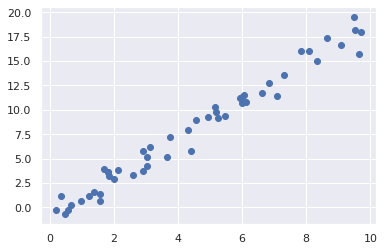

In [22]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Com esses dados disponíveis, podemos usar a receita descrita anteriormente. Vamos percorrer o processo:

#### 1. Escolha uma classe de modelo 

No Scikit-Learn, cada classe de modelo é representada por uma classe Python. 
Assim, por exemplo, se quisermos calcular um modelo de regressão linear simples, podemos importar a classe de regressão linear:

In [23]:
from sklearn.linear_model import LinearRegression

Observe que também existem outros modelos de regressão linear mais gerais; você pode ler mais sobre eles em [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Escolha os hiperparâmetros do modelo 
Um ponto importante é que *uma classe de modelo não é o mesmo que uma instância de um modelo*.



Depois de decidirmos sobre nossa classe de modelo, ainda existem algumas opções abertas para nós. Dependendo da classe de modelo com a qual estamos trabalhando, talvez precisemos responder a uma ou mais perguntas como as seguintes:

- Gostaríamos de ajustar o deslocamento (ou seja, interceptação em y )?
- Gostaríamos que o modelo fosse normalizado?
- Gostaríamos de pré-processar nossos dados para adicionar flexibilidade ao modelo?
- Que grau de regularização gostaríamos de usar em nosso modelo?
- Quantos componentes do modelo gostaríamos de usar?


Estes são exemplos de escolhas importantes que devem ser feitas quando a classe do modelo for selecionada. Essas escolhas são frequentemente representadas como hiperparâmetros ou parâmetros que devem ser definidos antes que o modelo se ajuste aos dados. 

No Scikit-Learn, os hiperparâmetros são escolhidos passando valores na instanciação do modelo.

Para nosso exemplo de regressão linear, podemos instanciar a classe `LinearRegression` e especificar que gostaríamos de ajustar a interceptação usando o hiperparâmetro `fit_intercept`:

In [28]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Tenha em mente que quando o modelo é instanciado, a única ação é armazenar esses valores de hiperparâmetros. Em particular, ainda não aplicamos o modelo a nenhum dado. 

A API do Scikit-Learn deixa muito clara a distinção entre a *escolha do modelo* e a *aplicação do modelo aos dados*.

#### 3. Organize os dados em uma matriz de características e um vetor alvo

Anteriormente, detalhamos a representação de dados do Scikit-Learn, que requer uma matriz de recursos bidimensional e um vetor alvo unidimensional. Aqui, nossa variável alvo `y` já está na forma correta (um array de comprimento ``n_sample``), mas precisamos trabalhar os dados `x` para torná-los uma matriz de tamanho `[n_samples, n_features]`. 

Neste caso, isso equivale a uma simples remodelagem da matriz unidimensional:

In [32]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Aplique o modelo aos dados

Agora é hora de aplicar nosso modelo aos dados. Isso pode ser feito com o método `fit()` do modelo:

In [33]:
model.fit(X, y)

LinearRegression()

O método `fit()` faz com que ocorram vários cálculos internos relacionados ao modelo, e os resultados desses cálculos são armazenados em atributos específicos do modelo que o usuário pode explorar. 

No Scikit-Learn, por convenção, todos os parâmetros do modelo que foram aprendidos durante o processo `fit()` possuem sublinhados no final. 

Por exemplo, neste modelo linear, temos o seguinte:

In [34]:
model.coef_

array([1.9776566])

In [35]:
model.intercept_

-0.9033107255311146

Esses dois parâmetros representam a inclinação e a interceptação do ajuste do modelo linear simples aos dados. 

Comparando com a definição dos dados, vemos que eles estão muito próximos da inclinação de entrada de 2 e da interceptação de -1.

Uma questão que surge frequentemente diz respeito à incerteza em tais parâmetros do modelo interno. Em geral, o Scikit-Learn não fornece ferramentas para tirar conclusões dos próprios parâmetros internos do modelo. 

Interpretar os parâmetros do modelo é muito mais uma questão de *modelagem estatística* do que uma questão de *aprendizado de máquina*. 

#### 5. Predição de rótulos desconhecidos

Uma vez treinado o modelo, a principal tarefa do aprendizado de máquina supervisionado é avaliá-lo com base no que ele diz sobre novos dados que não faziam parte do conjunto de treinamento. No Scikit-Learn, isso pode ser feito usando o método `predict()`. 

Para fins deste exemplo, nossos “novos dados” serão uma grade de valores de *x* e perguntaremos quais valores de *y* o modelo prevê:

In [36]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

Como antes, precisamos forçar esses valores de *x* em uma matriz de características ``[n_samples, n_features]``, após a qual podemos alimentá-los no modelo:

In [40]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, vamos visualizar os resultados traçando primeiro os dados brutos e, em seguida, este modelo se ajusta:

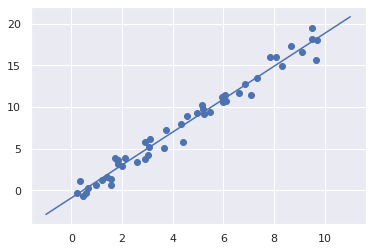

In [42]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Normalmente, a eficácia do modelo é avaliada comparando seus resultados com alguma linha de base conhecida, como veremos no próximo exemplo.

### Exemplo de aprendizagem supervisionada

Vamos dar uma olhada em outro exemplo desse processo, usando o conjunto de dados Iris que discutimos anteriormente. Nossa questão é esta: dado um modelo treinado em uma parte dos dados do Iris, quão bem podemos prever os rótulos restantes?

Para esta tarefa, usaremos um modelo generativo extremamente simples conhecido como *Gaussian naive Bayes*. Por ser tão rápido e não ter hiperparâmetros para escolher, o *Gaussian naive Bayes* costuma ser um bom modelo para usar como modelo de classificação *baseline*, antes de explorar se melhorias podem ser encontradas por meio de modelos mais sofisticados.

Gostaríamos de avaliar o modelo com base em dados que ele nunca viu antes e, portanto, dividiremos os dados em um conjunto de treinamento e um conjunto de teste . Isso poderia ser feito manualmente, mas é mais conveniente usar a função `train_test_split`:

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

Com os dados organizados, podemos seguir nossa receita para prever os rótulos:

In [55]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finalmente, podemos usar o `accuracy_score` para ver a fração de rótulos previstos que correspondem ao seu valor real:

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

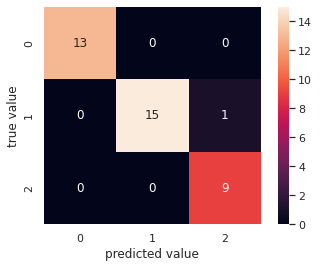

In [71]:
from sklearn.metrics import  

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

Com uma precisão superior a 97%, vemos que mesmo este algoritmo de classificação muito ingênuo é eficaz para este conjunto de dados.

### Exemplo de aprendizagem não supervisionada

Como exemplo de problema de aprendizado não supervisionado, vamos dar uma olhada na redução da dimensionalidade dos dados Iris para visualizá-los mais facilmente. Lembre-se de que os dados do Iris são quadridimensionais: há quatro características registradas para cada amostra.



A tarefa da redução da dimensionalidade é perguntar se existe uma representação de menor dimensão adequada que retenha as características essenciais dos dados. Muitas vezes a redução de dimensionalidade é usada como auxílio à visualização de dados.


Aqui usaremos a análise de componentes principais (PCA), que é uma técnica rápida de redução de dimensionalidade linear. Pediremos ao modelo que retorne dois componentes, construíndo assim uma representação bidimensional dos dados.



Seguindo a sequência de etapas descritas anteriormente, temos:

In [79]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Agora vamos plotar os resultados. Uma maneira rápida de fazer isso é inserir os resultados no `DataFramee` original do Iris e usar `lmplot` do Seaborn para mostrar os resultados:

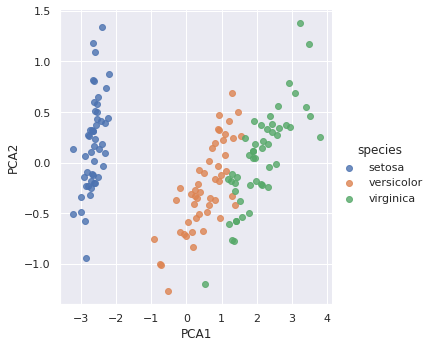

In [80]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species', fit_reg=False);








 

Vemos que na representação bidimensional, as espécies estão bastante bem separadas, embora o algoritmo PCA não tivesse conhecimento dos rótulos das espécies! Isto indica-nos que uma classificação relativamente simples será provavelmente eficaz no conjunto de dados, como vimos antes.

### Exemplo de aprendizagem não supervisionada

Vejamos a seguir a aplicação de *clustering* aos dados Iris. Um algoritmo de agrupamento tenta encontrar grupos distintos de dados sem referência a nenhum rótulo. Aqui usaremos um poderoso método de agrupamento chamado modelo de mistura gaussiana (*Gaussian mixture model*, GMM)). Um GMM tenta modelar os dados como uma coleção de bolhas gaussianas.



Podemos ajustar o modelo de mistura gaussiana da seguinte forma:

In [81]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,covariance_type='full')      # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                       # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                           # 4. Determine cluster labels

Como antes, adicionaremos o rótulo do cluster ao Iris DataFramee usaremos Seaborn para representar graficamente os resultados:

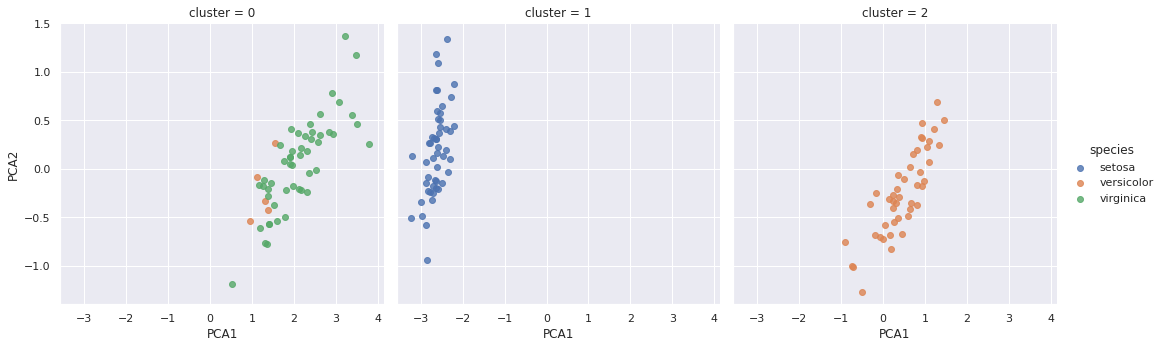

In [82]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species', col='cluster', fit_reg=False);

Ao dividir os dados por número de *cluster*, vemos exatamente quão bem o algoritmo GMM recuperou o rótulo subjacente: a espécie *setosa* está perfeitamente separada dentro do cluster 0, enquanto permanece uma pequena mistura entre *versicolor* e *virginica*. 

Isto significa que mesmo sem um especialista para nos dizer os rótulos das espécies das flores individuais, as medidas destas flores são suficientemente distintas para que possamos identificar *automaticamente* a presença destes diferentes grupos de espécies com um simples algoritmo de agrupamento. 

Esse tipo de algoritmo pode fornecer ainda mais pistas aos especialistas da área sobre a relação entre as amostras que estão observando.